In [1]:
import bydoux_tools as bt
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.time import Time

ticker_fund = '0P00007130.TO' # près de 2.5$/an

#ticker_fund = '0P0001MIFC.TO' # environ 1%/an
#ticker_fund = '0P000070RM.TO' # pas une correspondance exacte
#ticker_fund = '0P000070NT.TO' # près de 2.5$/an

tbl1 = bt.read_quotes(ticker_fund, force=True)
start1 = tbl1['mjd'][0]
end1 = tbl1['mjd'][-1]


tbl = Table.read('summary_ETF.csv',format='ascii.tab')
ticker_pool = tbl['Ticker'].data
# Check if BMP in longName
keep = np.zeros(len(ticker_pool), dtype=bool)
for i, ticker in enumerate(ticker_pool):
    if 'BMO' in tbl['longName'][i]:
        keep[i] = True
ticker_pool = np.array(ticker_pool)[keep]

"""
ticker_pool =  [
    'ZGI', 'ZCN', 'STPL', 'ZIU', 'COMM', 'ZDM', 'DISC', 'ZEA', 'ZEO', 'ZEM',
    'ZGD', 'ZUE', 'ZJG', 'ZSP', 'ZEAT', 'ZSP.U', 'ZMT', 'ZDJ', 'ZQQ', 'ESGA',
    'ZNQ', 'ESGY', 'ZNQ.U', 'ESGE', 'ZMID.F', 'ESGG', 'ZMID', 'ZGRN', 'ZMID.U', 'ZCLN',
    'ZSML.F', 'ESGB', 'ZSML', 'ESGF', 'ZSML.U', 'ZJPN', 'ZJPN.F', 'ZCS', 'ZID', 'ZCS.L',
    'ZCH', 'ZCM', 'ZLC', 'ZLB', 'ZPS', 'ZLH', 'ZPS.L', 'ZLU', 'ZFS', 'ZLU.U',
    'ZFS.L', 'ZLD', 'ZMP', 'ZLI', 'ZPL', 'ZLE', 'ZFM', 'ZUQ.F', 'ZFL', 'ZUQ',
    'ZUQ.U', 'ZAG', 'ZGQ', 'ZSB', 'ZEQ', 'ZCB', 'ZDV', 'ZDB', 'ZUD', 'ZSDB',
    'ZDY', 'ZCDB', 'ZDY.U', 'ZMMK', 'ZDH', 'ZST', 'ZDI', 'ZST.L', 'ZVC', 'ZMBS',
    'ZVU', 'ZGB', 'ZRR', 'ZOCT', 'ZBI', 'ZJUL', 'ZBBB', 'ZAPR', 'ZQB', 'ZJAN',
    'ZUAG', 'ZWC', 'ZUAG.F', 'ZWS', 'ZUAG.U', 'ZWH', 'ZSU', 'ZWH.U', 'ZMU', 'ZWA',
    'ZIC', 'ZWE', 'ZIC.U', 'ZWP', 'ZUCM', 'ZWG', 'ZUCM.U', 'ZWB', 'ZUS.U', 'ZWB.U',
    'ZUS.V', 'ZWK', 'ZTS', 'ZWU', 'ZTS.U', 'ZWHC', 'ZTM', 'ZWEN', 'ZTM.U', 'ZWT',
    'ZTL.F', 'ZWQT', 'ZTL', 'ZPAY.F', 'ZTL.U', 'ZPAY', 'ZTIP', 'ZPAY.U', 'ZTIP.U', 'ZPH',
    'ZTIP.F', 'ZPW', 'ZJK', 'ZPW.U', 'ZHY', 'ZJK.U', 'ZEB', 'ZFH', 'ZUT', 'ZEF',
    'ZRE', 'ZIN', 'ZPR', 'ZUB', 'ZPR.U', 'ZBK', 'ZHP', 'ZUH', 'ZUP', 'ZHU',
    'ZUP.U', 'PAGE', 'Ticker', 'Date', 'ASSET', 'ZCON', 'ZBAL', 'ZGRO', 'ZEQT', 'ZESG',
    'ZBAL.T', 'ZGRO.T', 'ZMI',  'ZLSC', 'ZLSU', 'ZZZD', 'ZACE', 'ARKK', 'ARKG',
    'ARKW', 'BGEQ', 'BGHC', 'BGIF', 'BGIN', 'BGDV', 'BGRT', 'GRNI', 'TOWR', 'WOMN',
    'ZGSB', 'ZMSB', 'ZCPB', 'ZFC', 'ZFN', 'ZXLE', 'ZXLU', 'ZXLK', 'ZXLB', 'ZXLP',
    'ZXLY', 'ZXLI', 'ZXLC', 'ZXLV', 'ZXLF', 'ZXLR', 'ZXLE.F', 'ZXLU.F', 'ZXLK.F', 'ZXLB.F',
    'ZXLP.F', 'ZXLY.F', 'ZXLI.F', 'ZXLC.F', 'ZXLV.F', 'ZXLF.F', 'ZXLR.F'
]

"""
ticker_pool = ['ZNQ','ZSP','EBNK','ZCN','QQQX','ZDM']


# in ticker_pool if ticker does not end with .TO, add .TO
for i in range(len(ticker_pool)):
    if not ticker_pool[i].endswith('.TO') and not ticker_pool[i].startswith('^'):
        ticker_pool[i] += '.TO'



slopes = np.zeros(len(ticker_pool))
delta_temps = np.zeros(len(ticker_pool))
rms_vals = np.zeros(len(ticker_pool))

for i, ticker2 in enumerate(ticker_pool):
    print(i,len(ticker_pool), ticker2)
    tbl2 = bt.read_quotes(ticker2)
    if tbl2 is None:
        continue

    start2 = tbl2['mjd'][0]
    end2 = tbl2['mjd'][-1]

    start0 = np.max([start1, start2])
    end0 = np.min([end1, end2])

    tbl1b = tbl1[(tbl1['mjd'] >= start0) & (tbl1['mjd'] <= end0)]
    tbl2b = tbl2[(tbl2['mjd'] >= start0) & (tbl2['mjd'] <= end0)]

    d1 = tbl1b['mjd']
    d2 = tbl2b['mjd']
    # find intersection of d1 and d2
    d_common = np.intersect1d(d1, d2)
    tbl1b = tbl1b[np.isin(d1, d_common)]
    tbl2b = tbl2b[np.isin(d2, d_common)]


    diff = tbl2b['log_close'] - tbl1b['log_close']
    if len(diff) < 10:
        continue

    fit = np.polyfit(tbl1b['mjd']/365.25, diff, 1)
    #rms = np.sqrt(np.mean((diff - np.polyval(fit, tbl1b['mjd']/365.25))**2))
    med = np.median(np.abs(diff - np.polyval(fit, tbl1b['mjd']/365.25)))
    dt = tbl1b['mjd'][-1] - tbl1b['mjd'][0]
    if dt<180:
        continue

    slopes[i] = fit[0]
    delta_temps[i] = dt
    rms_vals[i] = med

    slope = fit[0]
    print(f'Slope: {slope:.6f} per year, RMS: {med:.6f}, over {dt/365.25:.1f} years')

keep = rms_vals !=0
slopes = slopes[keep]
delta_temps = delta_temps[keep]
rms_vals = rms_vals[keep]
ticker_pool = np.array(ticker_pool)[keep]





0 6 ZNQ.TO
Slope: 0.015430 per year, RMS: 0.024327, over 1.7 years
1 6 ZSP.TO
Slope: 0.077581 per year, RMS: 0.033324, over 7.7 years
2 6 EBNK.TO
Slope: 0.249912 per year, RMS: 0.035094, over 3.7 years
3 6 ZCN.TO
Slope: 0.049760 per year, RMS: 0.006143, over 7.7 years
4 6 QQQX.TO
Slope: -0.021546 per year, RMS: 0.028452, over 1.3 years
5 6 ZDM.TO
Slope: 0.035742 per year, RMS: 0.030562, over 7.7 years


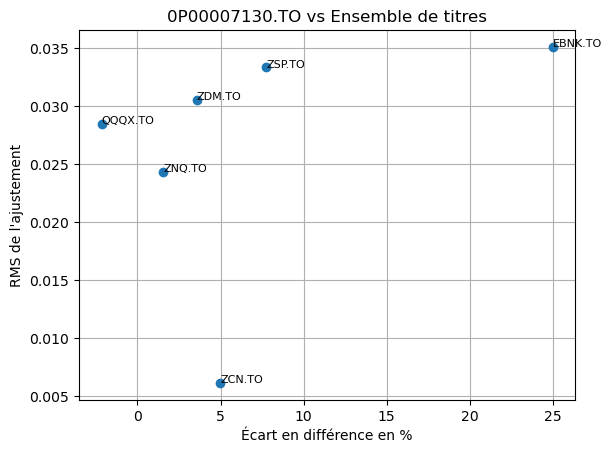

Meilleure correspondance : ZCN.TO, pente=4.98%, delta_temp=7.69 yr, RMS=0.0061

0P00007130.TO: BMO FNB d'actions canadiennes
ZCN.TO: BMO S&P/TSX Capped Composite Index ETF


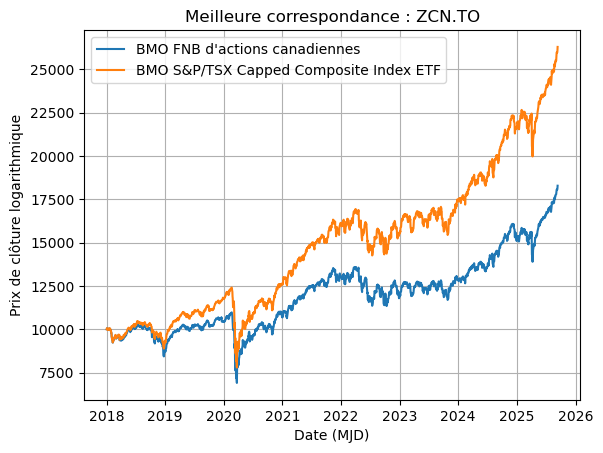

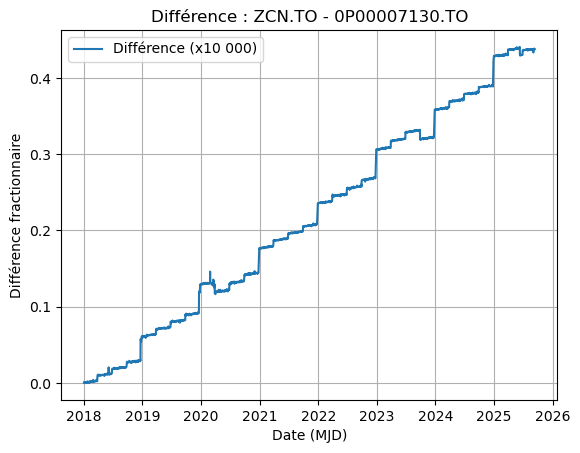

In [2]:
#xlim = [0,10]
#ylim = [0,0.1]
#g = (slopes*100 < xlim[1]) & (rms_vals < ylim[1]) & (slopes*100 > xlim[0]) & (rms_vals > ylim[0])
#slopes = slopes[g]
#rms_vals = rms_vals[g]
#ticker_pool = np.array(ticker_pool)[g]
#delta_temps = delta_temps[g]

plt.plot(slopes*100, rms_vals, 'o')
# Ajouter le nom de chaque titre à côté de chaque point
for i, ticker2 in enumerate(ticker_pool):
    plt.text(slopes[i]*100, rms_vals[i], ticker_pool[i], fontsize=8)
plt.xlabel("Écart en différence en %")
plt.ylabel("RMS de l'ajustement")
plt.title(f"{ticker_fund} vs Ensemble de titres")
plt.grid()
#plt.xlim(xlim)
#plt.ylim(ylim)
plt.show()

imin = np.nanargmin(rms_vals)
print(f"Meilleure correspondance : {ticker_pool[imin]}, pente={slopes[imin]*100:.2f}%, delta_temp={delta_temps[imin]/365.25:.2f} yr, RMS={rms_vals[imin]:.4f}")

tbl_best = bt.read_quotes(ticker_pool[imin])

start2 = tbl_best['mjd'][0]
end2 = tbl_best['mjd'][-1]

start0 = np.max([start1, start2])
end0 = np.min([end1, end2])

tbl1b = tbl1[(tbl1['mjd'] >= start0) & (tbl1['mjd'] <= end0)]
tbl2b = tbl_best[(tbl_best['mjd'] >= start0) & (tbl_best['mjd'] <= end0)]

d1 = tbl1b['mjd']
d2 = tbl2b['mjd']
# Trouver l'intersection de d1 et d2
d_common = np.intersect1d(d1, d2)
tbl1b = tbl1b[np.isin(d1, d_common)]
tbl2b = tbl2b[np.isin(d2, d_common)]

info1 = bt.get_info(ticker_fund)
info2 = bt.get_info(ticker_pool[imin])
print(f"\n{ticker_fund}: {info1['longName']}")
#print(f"ytodatereturns: {info1['ytdReturn']:.2f}%")
print(f"{ticker_pool[imin]}: {info2['longName']}")
#print(f"ytodatereturns: {info2['ytdReturn']:.2f}%")

v1 = 1e4*np.exp(tbl1b['log_close']-tbl1b['log_close'][0])
v2 = 1e4*np.exp(tbl2b['log_close']-tbl2b['log_close'][0])
plt.plot(tbl1b['plot_date'], v1, label=info1['longName'])
plt.plot(tbl2b['plot_date'], v2, label=info2['longName'])
plt.xlabel("Date (MJD)")
plt.ylabel("Prix de clôture logarithmique")
plt.title(f"Meilleure correspondance : {ticker_pool[imin]}")
plt.legend()
plt.grid()
plt.show()

diff = tbl2b['log_close'] - tbl1b['log_close']
plt.plot(tbl1b['plot_date'], v2/v1-1, label="Différence (x10 000)")
plt.xlabel("Date (MJD)")
plt.ylabel("Différence fractionnaire")
plt.title(f"Différence : {ticker_pool[imin]} - {ticker_fund}")
plt.legend()
plt.grid()
plt.show()